# Лабораторная работа #1
## По предмету: "Алгоритмические основы мультимедийных технологий"
## Тема: "Алгоритмы обработки фотографий"
### Выполнили: Терентьев Егор Дмитриевич НФИмд-01-23 1132236902 и Юдин Герман Станиславович НФИмд-02-23 1132236901

### Задание:
#### Реализовать алгоритмы обработки фотографий

Импортируем нужные библиотеки

In [8]:
from matplotlib.image import imread
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

### Алгоритм Black & White

#### Описание реализации алгоритма:
Функция **black_and_white** принимает матрицу в качестве аргумента и возвращает новую матрицу, где каждый элемент представляет собой среднее значение цвета пикселя в исходной матрице.

In [1]:
def black_and_white(matrix):
	new_matrix = []
	for i in range(len(matrix)):
		lst = []
		for j in range(len(matrix[i])):
			lst.append([sum(matrix[i][j]) / 3] * 3) # Для каждого пикселя вычисляется среднее значение цвета путем суммирования значений каналов цвета (красного, зеленого и синего) и деления на 3.
		new_matrix.append(lst)
	return new_matrix

Text(0.5, 1.0, 'Изображение с эффектом')

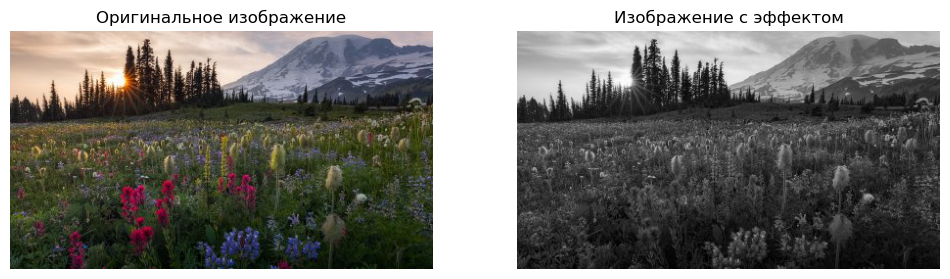

In [20]:
image2 = imread("img2.jpg")
imageBnW = black_and_white(image2)
# Масштабирование значений пикселей в диапазон 0-255
bw_image = np.array(imageBnW)
bw_image = np.clip(bw_image, 0, 255).astype(np.uint8)
# Вывод изображения
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(image2)
ax[0].axis('off')
ax[0].set_title('Оригинальное изображение')
ax[1].imshow(bw_image)
ax[1].axis('off')
ax[1].set_title('Изображение с эффектом')

### Алгоритм Негатив

#### Описание реализации алгоритма Негатив:
Функция **negative** принимает в качестве аргумента матрицу и возвращает новую матрицу, в которой каждый элемент получен путем инвертирования значений цветовых компонент исходной матрицы.

In [2]:
def negative(matrix):
	new_matrix = []
	for i in range(len(matrix)):
		lst = []
		for j in range(len(matrix[i])):
			lst.append([255 - matrix[i][j][k] for k in range(3)]) # разность 255 и значения каждой цветовой компоненты
		new_matrix.append(lst)
	return new_matrix

Text(0.5, 1.0, 'Изображение с эффектом')

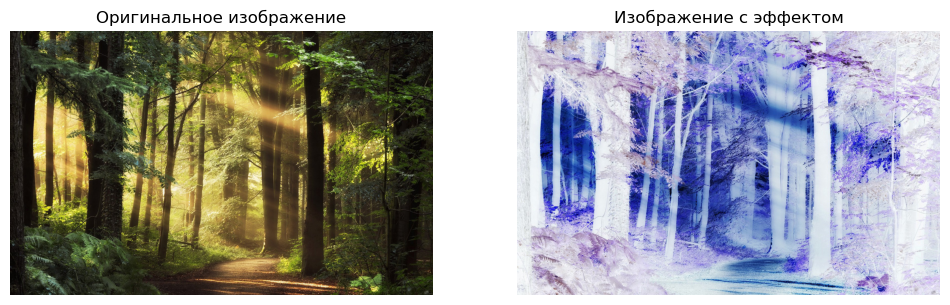

In [15]:
image1 = imread("img.jpg")
imageNegativeRaw = negative(image1)
# Вывод изображения
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(image1)
ax[0].axis('off')
ax[0].set_title('Оригинальное изображение')
ax[1].imshow(imageNegativeRaw)
ax[1].axis('off')
ax[1].set_title('Изображение с эффектом')

### Алгоритм Сепия

#### Описание реализации алгоритма Сепия:
функция **sepia** принимает в качестве аргумента матрицу, представленную в виде списка списков. Она выполняет преобразование изображения в сепию, изменяя значения цветовых каналов каждого пикселя в матрице.

Для каждого пикселя извлекаются значения R G B

Затем, с помощью формул преобразования в сепию, вычисляются новые значения для красного (sepia_r), зеленого (sepia_g) и синего (sepia_b) цветовых каналов. Эти значения ограничиваются в диапазоне от 0 до 255 с помощью функции min().

In [3]:
def sepia(matrix):
	new_matrix = []
	for i in range(len(matrix)):
		lst = []
		for j in range(len(matrix[i])):
			R = matrix[i][j][0]
			G = matrix[i][j][1]
			B = matrix[i][j][2]
			sepia_r = min(0.393 * R + 0.769 * G + 0.189 * B, 255) #Min Для ограничения в диапозоне (0,255)
			sepia_g = min(0.349 * R + 0.686 * G + 0.168 * B, 255) #Min Для ограничения в диапозоне (0,255)
			sepia_b = min(0.272 * R + 0.534 * G + 0.131 * B, 255) #Min Для ограничения в диапозоне (0,255)
			lst.append([sepia_r, sepia_g, sepia_b])
		new_matrix.append(lst)
	return new_matrix

Text(0.5, 1.0, 'Изображение с эффектом')

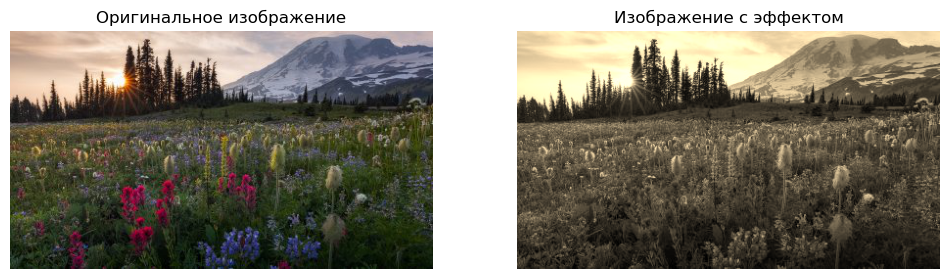

In [21]:
image3 = imread("img2.jpg")
imageSepia = sepia(image3)
# Масштабирование значений пикселей в диапазон 0-255
sepia_image = np.array(imageSepia)
sepia_image = np.clip(sepia_image, 0, 255).astype(np.uint8)
# Вывод изображения
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(image3)
ax[0].axis('off')
ax[0].set_title('Оригинальное изображение')
ax[1].imshow(sepia_image)
ax[1].axis('off')
ax[1].set_title('Изображение с эффектом')

### Алгоритм Яркость

#### Описание реализации алгоритма Яркость:
функция **brightness** принимает два аргумента: matrix (матрица) и k (яркость). Она выполняет операцию изменения яркости изображения, представленного в виде матрицы пикселей
    
Если значение k больше нуля, то яркость каждого пикселя увеличивается на k. Однако, чтобы не выйти за пределы допустимого диапазона значений (0-255), используется функция min(), которая выбирает минимальное значение между текущим значением яркости пикселя и 255. Таким образом, яркость пикселя не превышает 255.

Если значение k меньше или равно нулю, то яркость каждого пикселя уменьшается на k. Аналогично, используется функция max(), чтобы не выйти за пределы допустимого диапазона значений (0-255). В этом случае, яркость пикселя не может быть меньше 0    

In [4]:
def brightness(matrix, k):
	new_matrix = []
	average = 0
	for i in range(len(matrix)):
		lst = []
		for j in range(len(matrix[i])):
			if k > 0:
				lst.append((min(matrix[i][j][0] + k, 255), min(matrix[i][j][1] + k, 255), min(matrix[i][j][2] + k, 255)))
			else:
				lst.append((max(matrix[i][j][0] + k, 0), max(matrix[i][j][1] + k, 0), max(matrix[i][j][2] + k, 0)))
		new_matrix.append(lst)
	return new_matrix

Text(0.5, 1.0, 'Изображение с эффектом')

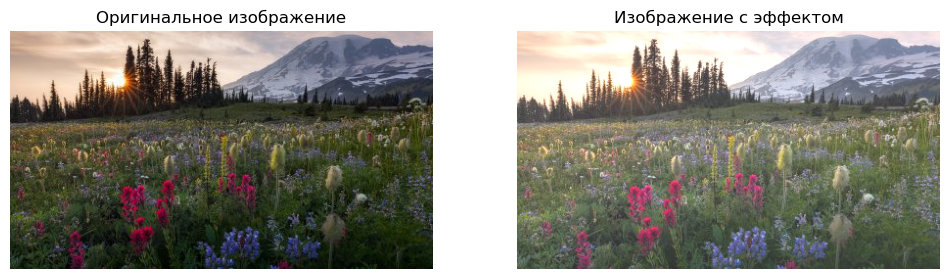

In [18]:
image4 = imread("img2.jpg")
imageBrightness = brightness(image4, 50)
# Вывод изображения
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(image4)
ax[0].axis('off')
ax[0].set_title('Оригинальное изображение')
ax[1].imshow(imageBrightness)
ax[1].axis('off')
ax[1].set_title('Изображение с эффектом')

### Алгоритм Размытия (blur)

#### Описание реализации алгоритма Размытие:
функция **blur** принимает матрицу изображения в виде списка списков и выполняет размытие изображения. Она применяет алгоритм размытия, который вычисляет среднее значение цвета пикселя и его соседей, учитывая заданный радиус размытия и коэффициент размытия

n: Радиус размытия - определяет количество соседних пикселей, учитываемых при вычислении среднего значения цвета.

a: Коэффициент размытия - определяет вклад исходного пикселя в итоговое размытое значение.

Мы проходимся по каждому пикселю в исходной матрице и вычисляем сумму значений цветовых каналов пикселя и его соседей. Количество учтенных пикселей определяется радиусом размытия **n**. Затем функция вычисляет среднее значение цвета пикселя, учитывая коэффициент размытия **a** и оригинальное значение пикселя. Полученное значение округляется и ограничивается в диапазоне от 0 до 255.

In [5]:
def blur(matrix, n=1, a=0.5):
	new_matrix = []
	for i in range(len(matrix)):
		lst = []
		for j in range(len(matrix[i])):
			count = -1
			summary = [-int(matrix[i][j][k]) for k in range(3)]
			for k in range(max(i - n, 0), min(i + n + 1, len(matrix))):
				for l in range(max(j - n, 0), min(j + n + 1, len(matrix[0]))):
					count += 1
					for p in range(3):
						summary[p] += int(matrix[k][l][p])
			for p in range(3):
				summary[p] = int(summary[p] / count * a)
				summary[p] += int(matrix[i][j][p] * (1 - a))
				summary[p] = min(summary[p], 255)
			
			lst.append(summary)
		new_matrix.append(lst)
	return new_matrix

Text(0.5, 1.0, 'Изображение с эффектом')

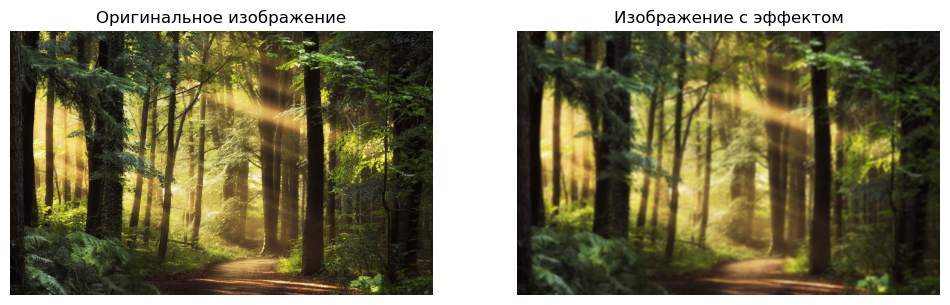

In [19]:
image5 = imread("img.jpg")
imageBlur = blur(image5, 5, 1)
# Вывод изображения
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(image5)
ax[0].axis('off')
ax[0].set_title('Оригинальное изображение')
ax[1].imshow(imageBlur)
ax[1].axis('off')
ax[1].set_title('Изображение с эффектом')

### Заключение
После выполнения данной лабораторной работы мы ознакомились и реализовали основные алгоритмы (фильтры) обработки фото.